In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

## 1. 텐서와 Autograd
* Tensor : 텐서는 PyTorch에서 다양한 수식을 계산하는 데 사용하는 가장 기본적인 자료구조<br>
\* 수학의 벡터나 행렬을 일반화한 개념, 숫자들을 특정한 모양으로 배열

### 1.1 텐서의 차원 조절

텐서에는 '차원' 또는 '랭크'라는 개념이 있다.
* 랭크 0 : 스칼라(숫자 하나), 1
* 랭크 1 : 벡터(숫자 나열), [1, 2, 3,]
* 랭크 2 : 2차원 행렬, [[1, 2, 3]]
* 랭크 3 : 3차원 행렬, [[[1,2,3]]], 3차원 이상은 랭크 n 텐서라고 부른다.

#### 1.1.1 2차원 텐서 만들기

In [2]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])

print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


#### 1.1.2  squeeze, unsqueeze 메소드로 차원 조절

In [3]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
# x = torch.unsqueeze(x, 1)
# x = torch.unsqueeze(x, 2)

print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3])
torch.Size([1, 3, 3])
3


In [4]:
# 랭크 늘리기
x = torch.squeeze(x)

print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


#### 1.1.3  view메소드를 통한 차원 조절

In [5]:
x = x.view(9)
print(x)
x = x.view(3, 3)
print(x)
x = x.view(9, 1)
print(x)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])


### 1.2 텐서를 이용한 연산과 행렬곱

In [6]:
w = torch.randn(5, 3, dtype=torch.float) # 정규분포에서 무작위로 값을 뽑아 텐서를 생성
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
b = torch.randn(5, 2, dtype=torch.float)

print("w size :", w.size())
print("x size :", x.size())
print("b size :", b.size())
print()
print("w:", w)
print("x:", x)
print("b:", b)

# 행렬 곱
wx = torch.mm(w, x)
print()
print("wx size:", wx.size())
print("wx:", wx)

#
result = wx + b
print()
print("result size:", result.size())
print("result:", result)

w size : torch.Size([5, 3])
x size : torch.Size([3, 2])
b size : torch.Size([5, 2])

w: tensor([[ 1.5395,  0.2947,  0.0835],
        [-0.2829,  1.4395,  1.8013],
        [ 0.0401, -0.4828,  0.0555],
        [-1.6980,  0.2335,  0.9844],
        [-0.6303, -0.6261, -0.3731]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
b: tensor([[-0.5834,  1.5006],
        [-1.1418, -0.7039],
        [ 0.5210, -0.7824],
        [ 0.1438, -0.1247],
        [-0.8895,  0.4901]])

wx size: torch.Size([5, 2])
wx: tensor([[ 2.8412,  4.7590],
        [13.0418, 15.9996],
        [-1.1306, -1.5178],
        [ 3.9245,  3.4444],
        [-4.3739, -6.0033]])

result size: torch.Size([5, 2])
result: tensor([[ 2.2578,  6.2595],
        [11.9000, 15.2957],
        [-0.6096, -2.3002],
        [ 4.0683,  3.3196],
        [-5.2634, -5.5133]])


### 1.3 AutoGrad
* AutoGrad : 자동으로 기울기를 구해줌 즉, 미분 계산을 자동화하여 경사하강법을 구현하는 수고를 덜어줌 
* 거리(distance) : 데이터에 대한 정답(ground truth)과 머신러닝 모델이 예측한 결과의 차이를 산술적으로 표현
* 오차(loss) : 학습 데이터로 계산한 거리들의 평균, 오차가 작을 수록 더 정확한 모델이라 볼 수 있다.
* 경사하강법 : 오차를 최소화하는 알고리즘 중 하나로, 오차를 수학 함수로 표현한 후 미분하여 이 함수의 기울기(gradient)를 구해 오차의 최솟값이 있는 방향을 찾아내는 알고리즘

#### 1.3.1 3w 을 w로 미분하는 값 구하기

In [7]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3
a.backward()
print("l을 w로 미분한 값은 {}".format(w.grad))

l을 w로 미분한 값은 3.0


#### 1.3.2 (9 * w^2) 을 w로 미분하는 값 구하기

In [8]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2

l.backward()
print("l을 w로 미분한 값은 {}".format(w.grad))

l을 w로 미분한 값은 18.0


## 2. 경사하강법으로 이미지 복원하기

### 2.1 오염된 이미지 문제

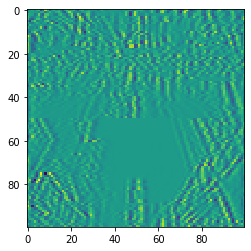

In [9]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding="utf-8"))
plt.imshow(broken_image.view(100, 100))

Loss at 0 = 12.446127891540527
Loss at 1000 = 1.1388330459594727
Loss at 2000 = 0.5459136962890625
Loss at 3000 = 0.37631821632385254
Loss at 4000 = 0.29427093267440796
Loss at 5000 = 0.2443375289440155
Loss at 6000 = 0.2092936784029007
Loss at 7000 = 0.18198934197425842
Loss at 8000 = 0.15906833112239838
Loss at 9000 = 0.1388230174779892
Loss at 10000 = 0.1203160509467125
Loss at 11000 = 0.10300056636333466
Loss at 12000 = 0.08654127269983292
Loss at 13000 = 0.07072428613901138
Loss at 14000 = 0.05540918931365013
Loss at 15000 = 0.04050141200423241
Loss at 16000 = 0.025937572121620178
Loss at 17000 = 0.021159702911973
Loss at 18000 = 0.021166283637285233
Loss at 19000 = 0.021167611703276634


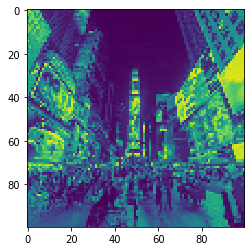

In [10]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1/3, 1/3, -1/3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
            
    return h


def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)


random_tensor = torch.randn(10000, dtype=torch.float)
lr = 0.8

for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
        
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")
        
plt.imshow(random_tensor.view(100, 100).data)